# KMeans

Some Links :- https://www.youtube.com/watch?v=YWgcKSa_2ag&t=238s

https://realpython.com/k-means-clustering-python/
    
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
    
https://stackabuse.com/k-means-clustering-with-scikit-learn/

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

##### Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

Partitional clustering methods have several strengths:

They work well when clusters have a spherical shape.
They’re scalable with respect to algorithm complexity.
They also have several weaknesses:

They’re not well suited for clusters with complex shapes and different sizes.
They break down when used with clusters of different densities.

In [ ]:
#KMeans clustering is unsupervised ML. Initially two centriod(or mean) points are assigned randomly.
#Find out distance between every point to mentioned two centriod. This process continued till repositioning stops. 
#Example if we assume k1 is 7 and k2 is 25 then mean of that cluster is same then we will have to stop.

#KMeans clustering works on distance measures.

#Clustering - Hierarchical Clustering and Partioning(Centriod) clustering.
#Partioning clustering - Kmeans and Fuzzy C mean
#Hierarchical Clustering (Tree Structure) - Divisive (Top Down Approach) and Agglomeritive (Bottom up approach)

#in K means object cannot belongs to more than one clusters but in fuzzy it can belong to one and more clusters.
# We will use the Euclidean distance measure for Kmeans. It is SQTp2 -SQTq2 of points p and q.  

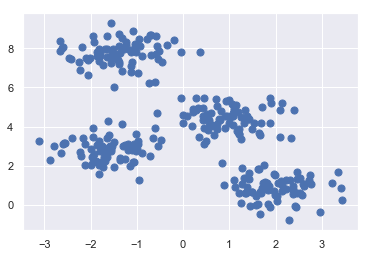

In [10]:
#Problem -Walmart wants to open the chain of stores across florida and want to find out the store location to optimize the revenue.
#Solution - Walmart can use its online customer data to analyse the customers loactions (Address) along with mothly sales.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling 
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300,centers=4, cluster_std=0.60,random_state=0)
X.shape
y_true
plt.scatter(X[:,0],X[:,1],s=50);

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

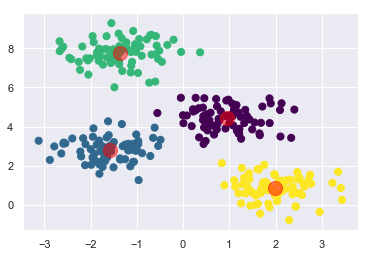

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1.Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        #2a. Assign lables based on closest center
        lables=pairwise_distances_argmin(X,centers)
        
        #2b. Find new centers from mean of points
        new_centers = np.array([X[lables == i].mean(0)
                               for i in range(n_clusters)])
        
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers =new_centers
        
    return centers, lables  

centers, lables = find_clusters(X,4)

plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c= 'red', s=200, alpha=0.5);

In [ ]:
########################## Exercise #######################
    #Color comparision of flower image 

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++') # init="random" is also an option
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_) 
    
# kmeans.cluster_centers_, kmeans.n_iter_ is also an parameter. kmeans.labels_[:5] to see the labels.

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
 
# kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing" ---- to get the value from elbow graph.

In [ ]:
# In [17]: # A list holds the silhouette coefficients for each k
#    ...: silhouette_coefficients = []
#    ...:
#    ...: # Notice you start at 2 clusters for silhouette coefficient
#    ...: for k in range(2, 11):
#    ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#    ...:     kmeans.fit(scaled_features)
#    ...:     score = silhouette_score(scaled_features, kmeans.labels_)
#    ...:     silhouette_coefficients.append(score)

# Evalution Metrics of Kmeans

Inertia -----

In [ ]:
# Inertia -----
# Recall the first property of clusters we covered above. This is what inertia evaluates. It tells us how far the points within 
# a cluster are. So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of 
# that cluster.

# We calculate this for all the clusters and the final inertial value is the sum of all these distances. This distance within 
# the clusters is known as intracluster distance. So, inertia gives us the sum of intracluster distances:

Dunn Index -- 

In [1]:
# the Dunn index also takes into account the distance between two clusters. This distance between the centroids of two different 
# clusters is known as inter-cluster distance. Let’s look at the formula of the Dunn index:

# Dunn index is the ratio of the minimum of intra-cluster distances and maximum of intercluster distances.
# In order to maximize the value of the Dunn index, the numerator should be maximum. Here, we are taking the minimum of the 
# intra-cluster distances. So, the distance between even the closest clusters should be more which will eventually make sure 
# that the clusters are far away from each other.

Silhouette Coefficient = (x-y)/ max(x,y)
where, y is the mean intra cluster distance: mean distance to the other instances in the same cluster. 
x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster.

The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.

## Evaluating Clustering Performance Using Advanced Techniques

In [19]: from sklearn.cluster import DBSCAN
   ...: from sklearn.datasets import make_moons
   ...: from sklearn.metrics import adjusted_rand_score
    
In [20]: features, true_labels = make_moons(
   ...:     n_samples=250, noise=0.05, random_state=42
   ...: )
   ...: scaled_features = scaler.fit_transform(features)
    
In [21]: # Instantiate k-means and dbscan algorithms
   ...: kmeans = KMeans(n_clusters=2)
   ...: dbscan = DBSCAN(eps=0.3)
   ...:
   ...: # Fit the algorithms to the features
   ...: kmeans.fit(scaled_features)
   ...: dbscan.fit(scaled_features)
   ...:
   ...: # Compute the silhouette scores for each algorithm
   ...: kmeans_silhouette = silhouette_score(
   ...:     scaled_features, kmeans.labels_
   ...: ).round(2)
   ...: dbscan_silhouette = silhouette_score(
   ...:    scaled_features, dbscan.labels_
   ...: ).round (2)
    
In [22]: kmeans_silhouette
Out[22]: 0.5

In [23]: dbscan_silhouette
Out[23]: 0.38
    
In [25]: ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
   ...: ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

Since the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. You can use the scikit-learn implementation of a common metric called the adjusted rand index (ARI). Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Compare the clustering results of DBSCAN and k-means using ARI as the performance metric:
    
In [26]: round(ari_kmeans, 2)
Out[26]: 0.47

In [27]: round(ari_dbscan, 2)
Out[27]: 1.0

Based on the above output, you can see that the silhouette coefficient was misleading. ARI shows that DBSCAN is the best choice for the synthetic crescents example as compared to k-means.

The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.

The ARI improves significantly as you add components. It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.

### Hierarchical Clustering

https://github.com/rimanshu/Machine-Learning-with-Python-1/blob/master/Clustering-Dimensionality-Reduction/Hierarchical_Clustering.ipynb

Hierarchical Clustering

Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a dendrogram. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The strengths of hierarchical clustering methods include the following:

They often reveal the finer details about the relationships between data objects.
They provide an interpretable dendrogram.
The weaknesses of hierarchical clustering methods include the following:

They’re computationally expensive with respect to algorithm complexity.
They’re sensitive to noise and outliers.

How to find clusture ------ longest vertical line such that none of the horizontal line passes through.

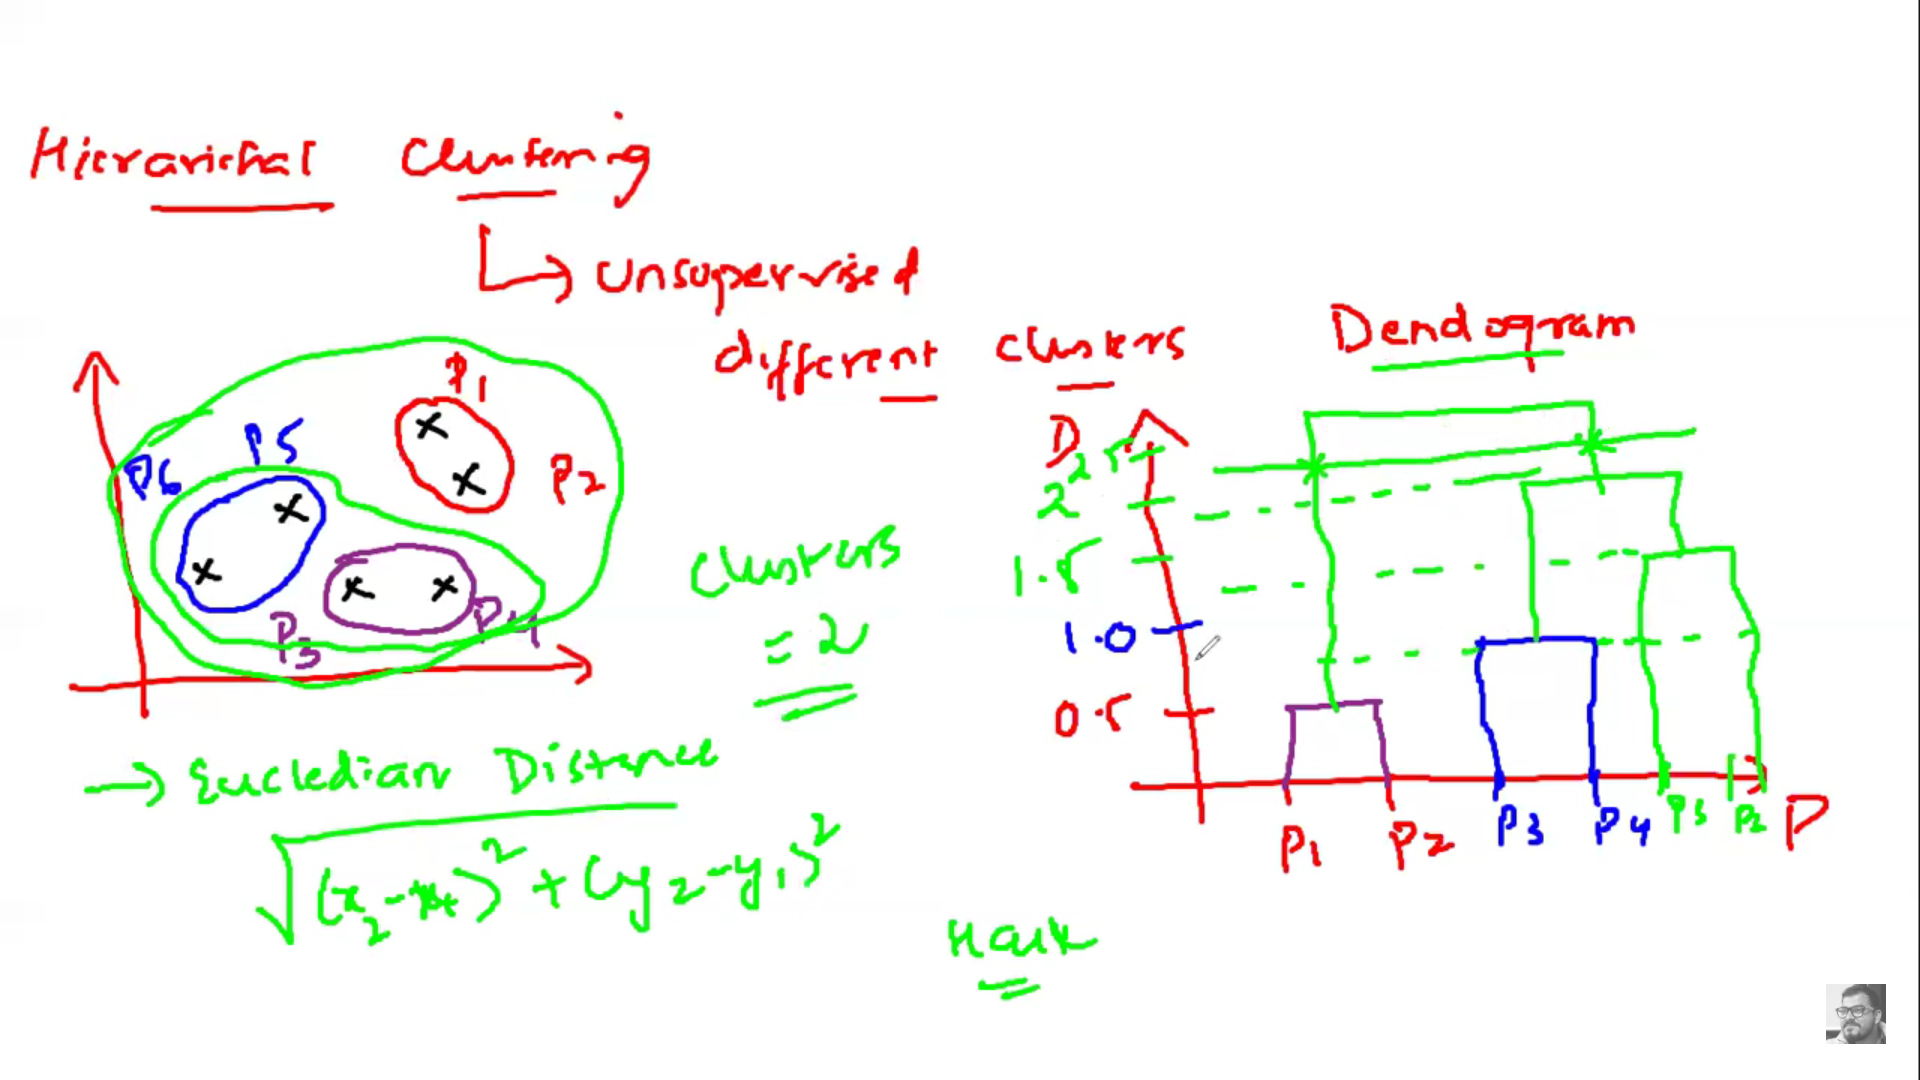

For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

#### Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

Now we got good clusters.

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')

model.fit(df[[0,1]])

### Density-Based Clustering

Density-Based Clustering

Density-based clustering determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach doesn’t require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

The strengths of density-based clustering methods include the following:

They excel at identifying clusters of nonspherical shapes.
They’re resistant to outliers.

The weaknesses of density-based clustering methods include the following:

They aren’t well suited for clustering in high-dimensional spaces.
They have trouble identifying clusters of varying densities.

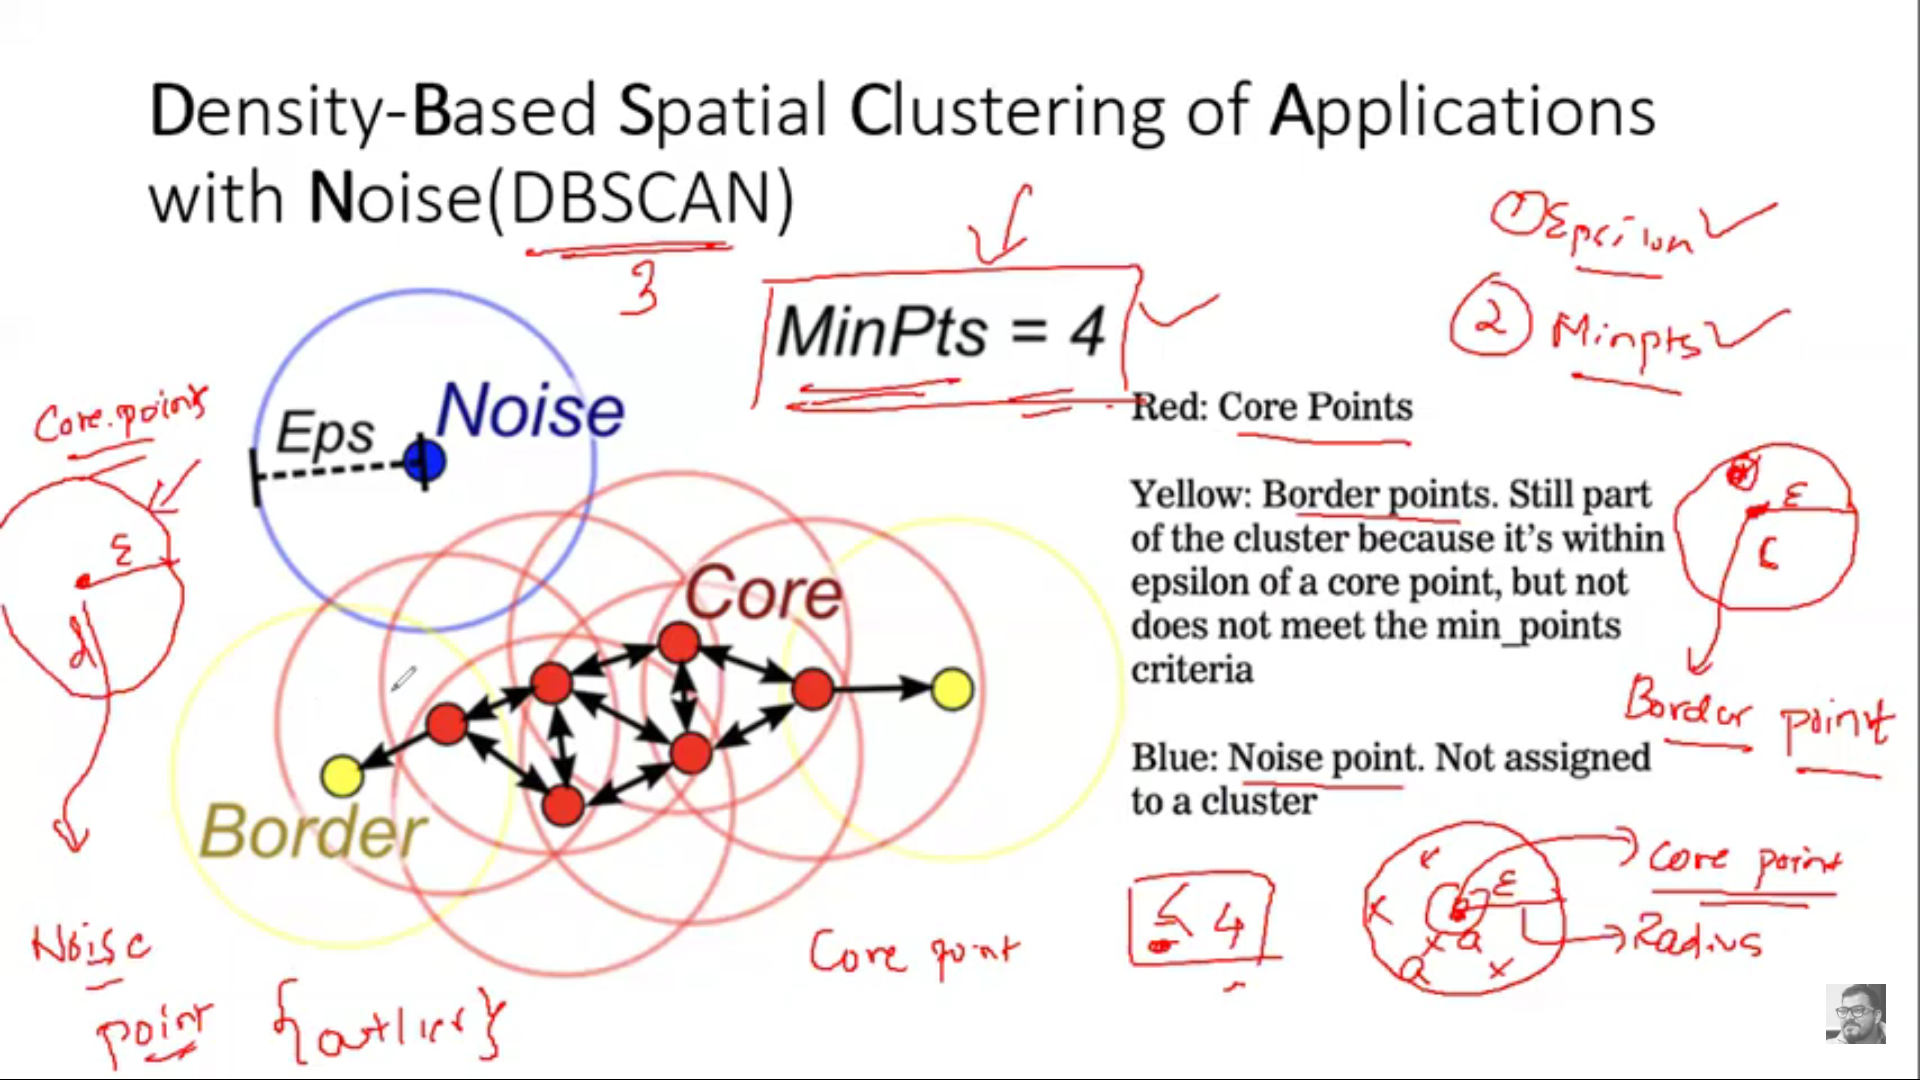

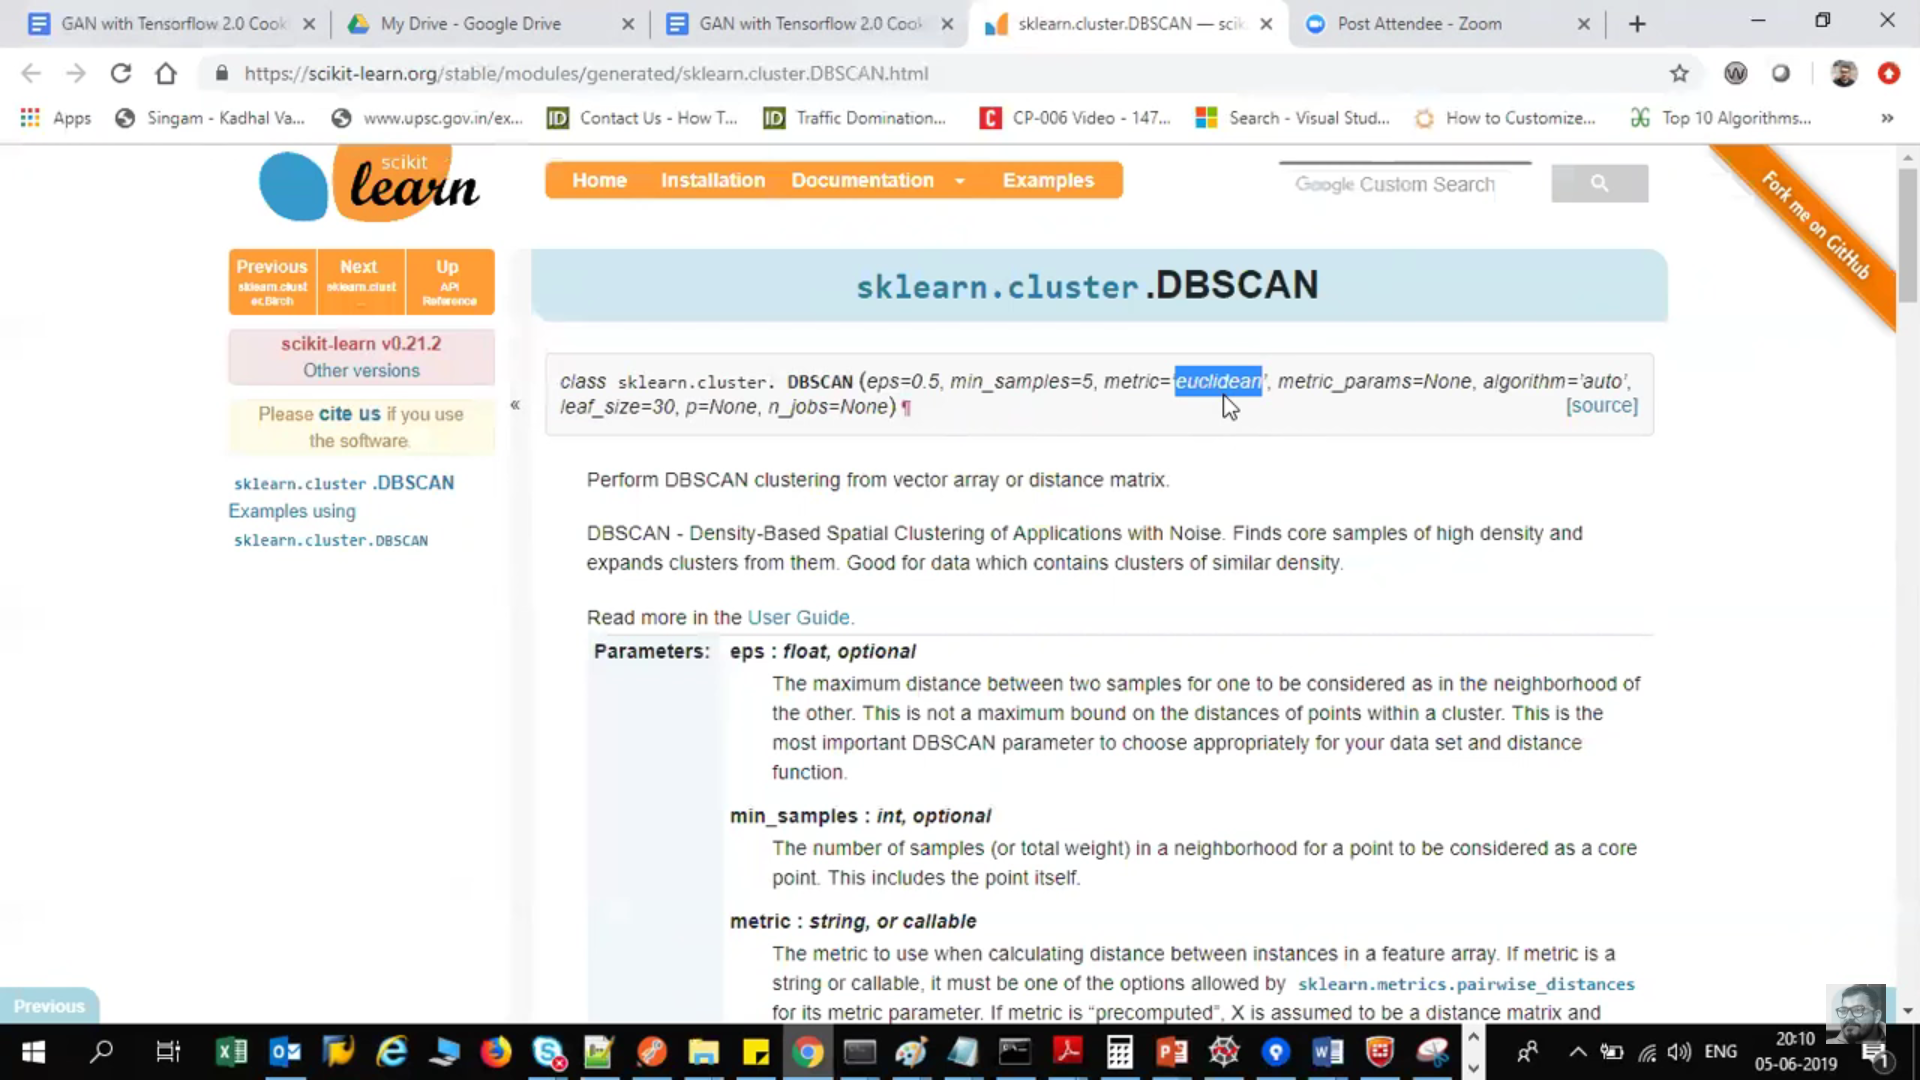

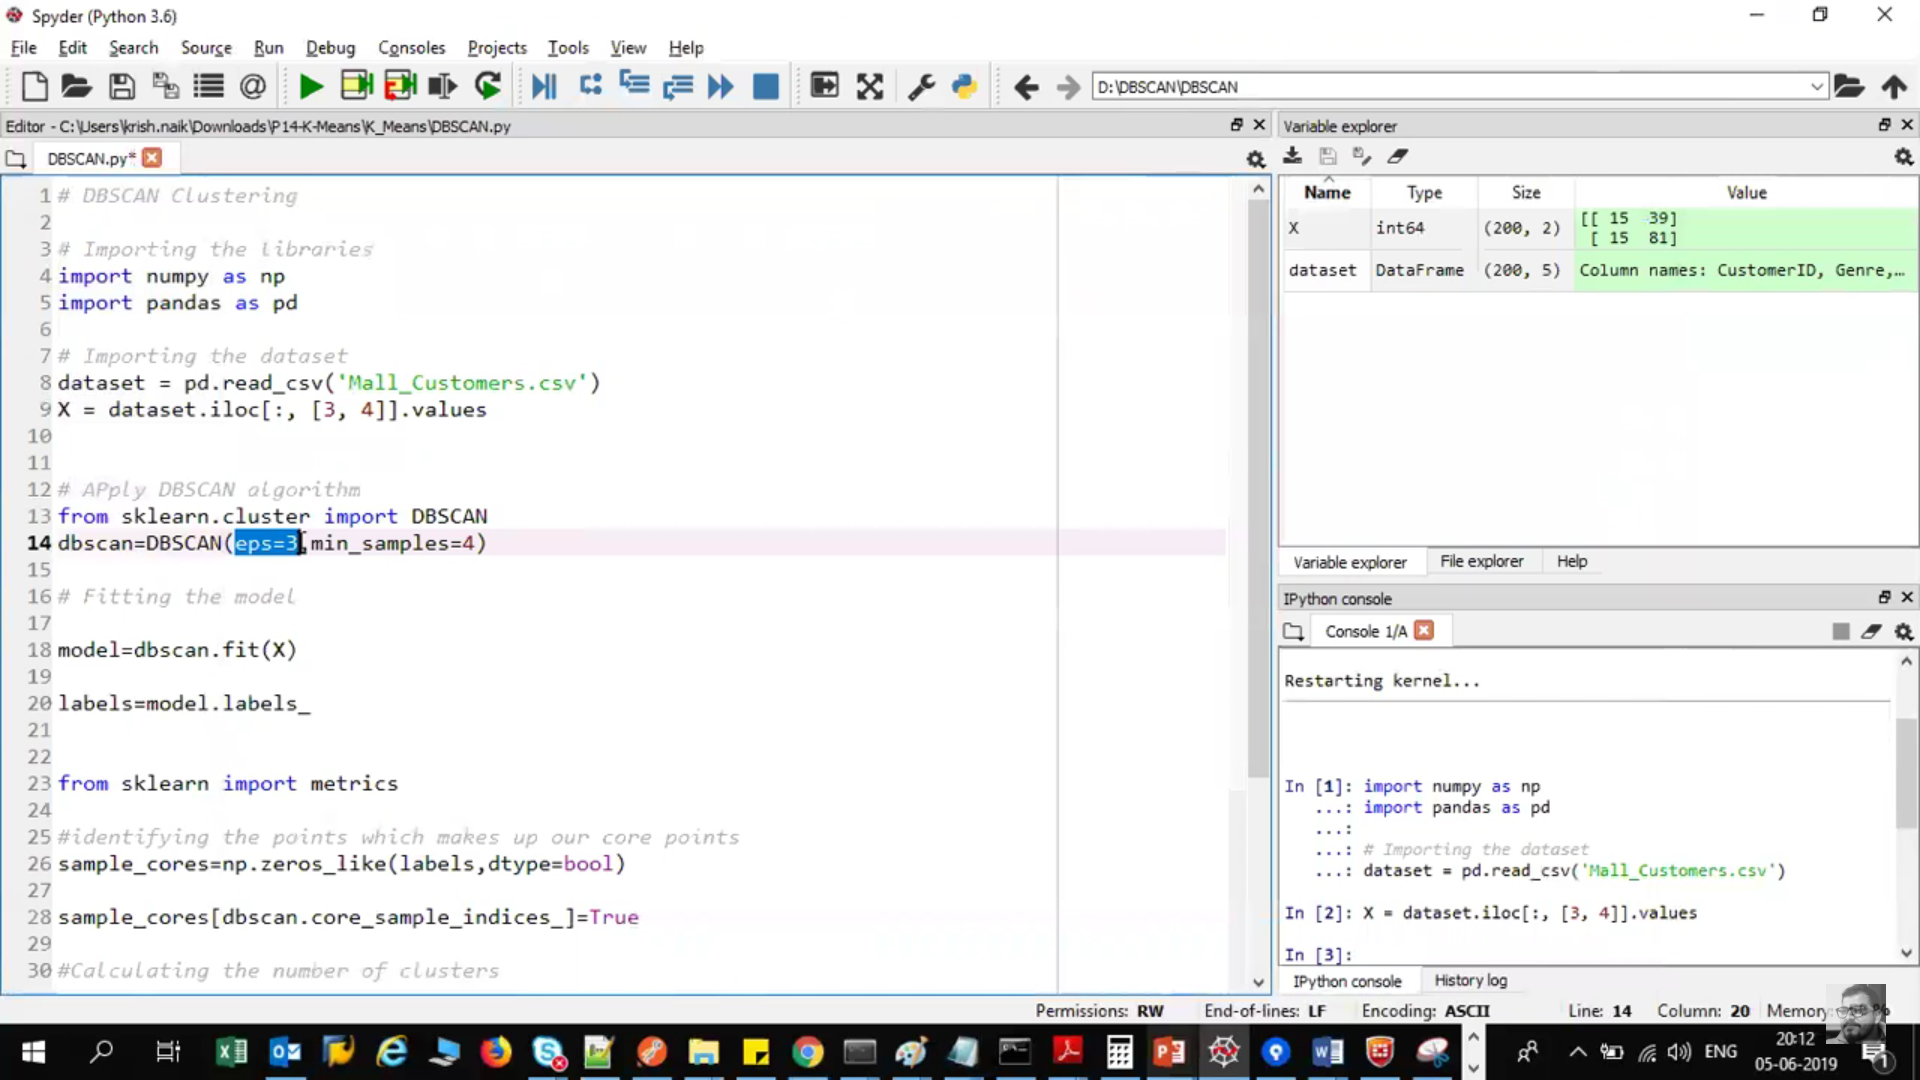